In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

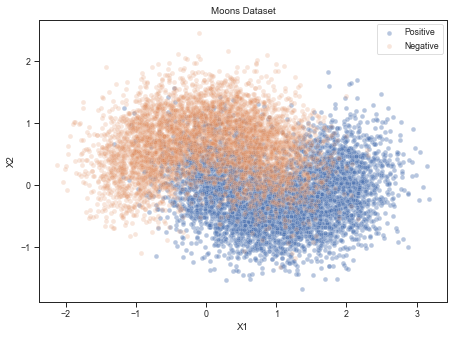

In [2]:
# Part a
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)

ax = sns.scatterplot(x=X[:, 0][y == 1], y=X[:, 1][y == 1], alpha=0.4, label='Positive')
sns.scatterplot(x=X[:, 0][y == 0], y=X[:, 1][y == 0], alpha=0.2, label='Negative', ax=ax)
ax.set(title="Moons Dataset", xlabel="X1", ylabel="X2")
plt.savefig('P2_a.png')
plt.show()

In [3]:
# Part b
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# Part c
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

params = {
    'max_leaf_nodes': list(range(1, 20)),
    'max_depth': list(range(1, 20)),
}

gscv = GridSearchCV(dtc, params, cv=10, scoring="accuracy",
                    return_train_score=True, n_jobs=-1)
gscv.fit(X_train, y_train)

print(gscv.best_params_)
print('Accuracy:', round(gscv.score(X_train, y_train), 4))

{'max_depth': 7, 'max_leaf_nodes': 18}
Accuracy: 0.8669


In [5]:
# Part d
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier(**gscv.best_params_)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
d_score = dtc.score(X_test, y_test)

print('Accuracy:', round(d_score, 4))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8565
Confusion Matrix:
[[854 162]
 [125 859]]


In [6]:
# Part e
from sklearn.model_selection import ShuffleSplit

# Generate 1000 subsets of length 100 from the train data randomly with replacement.
rs = ShuffleSplit(n_splits=1000, train_size=0.0125)
rs.get_n_splits(X_train)

X_subsets = {}
y_subsets = {}
for i, ilist in enumerate(rs.split(X_train)):
    X_subsets[i] = X_train[ilist[0], :]
    y_subsets[i] = y_train[ilist[0]]

In [7]:
# Part f
from sklearn.base import clone

scores = []
models = []
for i in X_subsets:
    m = clone(dtc)
    m.fit(X_subsets[i], y_subsets[i])
    models.append(m)
    scores.append(m.score(X_test, y_test))

print('Average Accuracy:', round(np.mean(scores), 4), '±', round(np.std(scores), 4))
print('Max Accuracy:', round(max(scores), 4))
print('Min Accuracy:', round(min(scores), 4))

Average Accuracy: 0.794 ± 0.0258
Max Accuracy: 0.8505
Min Accuracy: 0.689


In [8]:
# Part g
from scipy.stats import mode

y_pred = np.zeros(y_test.shape, dtype=int)
for i in range(X_test.shape[0]):
    preds = []
    for m in models:
        preds.append(m.predict([X_test[i]])[0])
    y_pred[i] = mode(preds)[0][0]

In [9]:
# Part h
from sklearn.metrics import accuracy_score

h_score = accuracy_score(y_test, y_pred)
print('Accuracy:', round(h_score, 4))
print('Improvement comparing to part d:', round(h_score - d_score, 4))

Accuracy: 0.8615
Improvement comparing to part d: 0.005
